<div class="alert alert-block alert-warning">
    

Bir kümedeki her karakter için karakter kodlamaları alabiliriz. Örneğin, ASCII değerleri. Fakat bu, bir kelimenin anlamını anlamamıza yardımcı olacak mı? Örneğin, burada gösterildiği gibi 'DİNLEME' kelimesini düşünün. Yaygın bir basit karakter kodlaması, burada gösterilen değerlerle Amerikan Bilgi Değişimi Standart Kodu olan ASCII'dir. Yani bu değerleri kullanarak kodlanmış DİNLE gibi bir kelimeye sahip olabileceğinizi düşünebilirsiniz. Ama elbette bununla ilgili sorun, kelimenin anlamının harflerde kodlanmamış olmasıdır. Bu, çok farklı ve neredeyse zıt bir anlama sahip, ancak tamamen aynı harflere sahip olan 'SESSİZ' kelimesi kullanılarak gösterilebilir. Öyle görünüyor ki, sadece harflerle bir sinir ağını eğitmek göz korkutucu bir görev olabilir. Peki ya kelimeleri ele alırsak? Sözcüklere bir değer verip bu değerleri bir ağ eğitiminde kullanabilseydik ne olurdu? Şimdi bir yere varabiliriz. Örneğin, bu cümleyi düşünün, Köpeğimi seviyorum. Her kelimeye bir değer vermeye ne dersiniz? Bu değerin ne olduğu önemli değil. Sadece kelime başına bir değerimiz var ve değer her seferinde aynı kelime için aynı. Bu nedenle, cümle için basit bir kodlama, örneğin 'Ben' kelimesine bir değerini vermek olacaktır. Daha sonra 'Aşk', 'benim' ve 'köpek' kelimelerine sırasıyla 2, 3 ve 4 değerlerini verebiliriz. O zaman köpeğimi seviyorum cümlesi 1, 2, 3, 4 olarak kodlanacaktı. Peki şimdi, kedimi seviyorum cümlesini alsam ne olur? 'I love my' kelimelerini zaten 1, 2, 3 olarak kodladık. Böylece bunları yeniden kullanabiliriz ve daha önce görmediğimiz cat için yeni bir jeton oluşturabiliriz. Şimdi bunu 5 numara yapalım. Şimdi sadece iki kodlama grubuna bakarsak, cümleler arasında bir miktar benzerlik görmeye başlayabiliriz. Köpeğimi seviyorum 1, 2, 3, 4 ve kedimi seviyorum 1, 2, 3, 5. Yani bu en azından bir başlangıç ​​ve kelimelere dayalı bir sinir ağı eğitimine nasıl başlayabiliriz. Neyse ki, TensorFlow ve Care Ask bize bunu yapmayı çok kolaylaştıran bazı API'ler veriyor. Sıradakilere bakacağız.

<div class="alert alert-block alert-warning">


İşte az önce bahsettiğimiz iki cümleyi kodlamak için kod. Satır satır açalım. Tensorflow ve keras bize kelimeleri kodlamak için birkaç yol sunar, ancak benim odaklanacağım şey Tokenizerdir. Bu, bizim için ağır yükü kaldıracak, kelime kodlamaları sözlüğünü oluşturacak ve cümlelerden vektörler yaratacaktır. Cümleleri bir diziye koyacağım. Cümlenin başında olduğu gibi 'I' harfini büyük harfle yazdığımı unutmayın. Daha sonra belirteç oluşturucunun bir örneğini oluştururum. Pasif bir parametre numarası ona bağlıdır. Bu durumda, bu verilerde yalnızca beş farklı kelime olduğu için çok büyük olan 100 kullanıyorum. Çok sayıda metne dayalı bir eğitim seti oluşturuyorsanız, genellikle o metinde kaç benzersiz farklı kelime olduğunu bilemezsiniz. Bu hiperparametreyi ayarlayarak, belirteç oluşturucunun yapacağı şey, hacimce ilk 100 kelimeyi almak ve bunları kodlamaktır. Bu, çok sayıda veriyle uğraşırken kullanışlı bir kısayoldur ve bu kursun ilerleyen bölümlerinde gerçek verilerle çalışırken denemeye değer. Bazen daha az kelimenin etkisi minimum ve eğitim doğruluğu olabilir, ancak eğitim süresi çok büyük olabilir, ancak dikkatli kullanın. Belirteç oluşturucunun metinlere sığdırma yöntemi daha sonra verileri alır ve kodlar. Belirteç oluşturucu, anahtar değer çiftlerini içeren bir sözlük döndüren bir sözcük dizini özelliği sağlar; burada, anahtar sözcüktür ve değer, bu sözcüğün belirtecidir ve bunu basitçe yazdırarak inceleyebilirsiniz. Sonuçları burada görebilirsiniz. Kelimenin büyük harfle yazıldığını söylediğimizi hatırlayın, burada küçük harfli olduğuna dikkat edin. Belirteçleyicinin sizin için yaptığı başka bir şey de bu. Noktalama işaretlerini ortadan kaldırır. Bu durumu göz önünde bulundurursanız, bu gerçekten yararlıdır. Buraya bir cümle daha ekledim, 'Köpeğimi seviyorsun!' ama çok farklı bir şey var. 'Köpek!' kelimesinden sonra bir ünlem ekledim. Şimdi, bu sadece köpekten farklı bir kelime olarak mı ele alınmalı? Tabii ki hayır. Bu yeni veri bütünü ile daha önce gördüğümüz kodun sonuçları şöyle görünecek. Anahtar olarak hala sadece 'köpek' olduğuna dikkat edin. Ünlem bunu etkilemedi ve elbette, tespit edilen 'siz' kelimesi için yeni bir anahtarımız var. Yani, bazı çok basit kod yoğun akış ve keralarla, o metnin kelime tabanlı kodlamalarını oluşturarak metinleri ele almanın başlangıcını gördünüz. Bir sonraki videoda, koda bir göz atacağız ve nasıl çalıştığını göreceğiz.

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


<div class="alert alert-block alert-warning">


Burada, keras'ın yeniden işleme kitaplığındaki belirteci görebilirsiniz. nlp söz konusu olduğunda token sizin arkadaşınızdır. Belirteçleri yönetmenin, metninizi belirteç akışlarına vb. dönüştürmenin tüm ağır yükünü kaldırır. Şimdi, buna ihtiyaç duymanızın nedeni, sinir ağlarını eğitmek söz konusu olduğunda, çok fazla matematik yapacaksınız ve matematik sayılarla ilgilenir ve kelimeleri bir sinir ağında eğitmek yerine, aslında o kelimeyi temsil eden sayıya sahip olabilirsiniz ve bu hayatınızı çok daha kolaylaştırır. Burada, "Köpeğimi ve kedimi seviyorum" cümlelerimin yer aldığı bir metinler bütününe sahip olduğumu görebilirsiniz ve belirteç kullananları belirteceğim. Bilmek için, belirteç oluşturucu genellikle NumWords özelliğini veya NumWords parametresini kullanarak belirteç oluşturur. Bu durumda, yapacağı şey, simgeleştirdiği metinler gövdenizde, en yaygın 100 kelimeyi veya buraya gerçekten koyduğunuz değeri alacaktır. Burada 100 benzersiz kelimeden çok daha azına sahibim, bu yüzden gerçekten bir etkisi olmayacak. O zaman metinlere sığacak olan şey, metnin tüm gövdesini gözden geçirecek ve anahtarın kelime olduğu ve değerin o kelimenin simgesi olduğu bir sözlük oluşturacaktır. Bunu çalıştırırsam, aslında bunu eylemde göreceğiz. Yani burada şimdi benim için bir kelime indeksi oluşturduğunu ve kelime indekslerini görebilirsiniz; Ben bir numara olacağım, aşk iki numara, benim üç numaram, köpek dört numara ve kedi beş numara olacak. Yani bunlar aslında bu metin külliyatında bulunan benzersiz kelimelerdir. Dikkate alınması gereken birkaç şey; birincisi, boşluk ve virgül gibi noktalama işaretlerinin fiilen kaldırılmış olmasıdır. Bu yüzden, sadece kelimeleri gerçekten çıkarmak için metnimi benim için bu şekilde temizliyor. İkincisi, burada küçük i harfim ve burada büyük ben harfi olduğunu fark etmişsinizdir. Bir büyük/küçük harfe duyarsız hale getirmek için görebileceğiniz gibi, sadece I kullanıyor ve her ikisi için de aynı jetonu veriyor. Şimdi, buna bazı yeni kelimeler ekleyerek biraz değiştirecek olsam, örneğin burada köpeğimi seviyorsun, dikkat et ki U harfi büyük harfle yazılıyor ve köpeğin arkasından bir ünlem var, ama bunu önceki köpekle karıştırmayacak. . Yani çalıştırırsam, şimdi tamamen yeni bir jeton setim olduğunu göreceğiz. Bende bir tane yeni var, bende beş tane eksi var ve bunun nedeni bu derlemdeki tek benzersiz yeni kelime sen kelimesi olmasıdır, çünkü love my and dog veya onların daha önceleri ama köpek ünleminin kaldırıldığını göreceksin. Bu, belirteç oluşturucunun gerçekte nasıl çalıştığına dair temel bir giriş ve bu kursta bunu çok kullanacaksınız.

<div class="alert alert-block alert-warning">

Bir önceki videoda, sözcükleri ve cümleleri nasıl tokenleştireceğinizi, bir bütünce oluşturmak için tüm sözcüklerden oluşan bir sözlük oluşturduğunuzu gördünüz. Bir sonraki adım, cümlelerinizi bu belirteçlere dayalı değer listelerine dönüştürmek olacaktır. Bunlara sahip olduğunuzda, muhtemelen her cümleyi aynı uzunlukta yapmak için değil, bu listeleri manipüle etmeniz de gerekecektir, aksi takdirde onlarla bir sinir ağı eğitmek zor olabilir. Görüntüler yaparken, sinir ağına beslediğimiz görüntünün boyutuna sahip bir girdi katmanı tanımladığımızı hatırlayın. Görüntülerin farklı boyutta olduğu durumlarda, onları sığacak şekilde yeniden boyutlandırırdık. Aynı şeyle metinle karşılaşacaksınız. Neyse ki TensorFlow, bu sorunları ele almak için API'ler içerir. Bu videoda bunlara bakacağız. Bir dizi listesi oluşturmaya başlayalım, oluşturduğumuz belirteçlerle kodlanmış cümleler ve bunun üzerinde çalıştığımız kodu güncelledim. Öncelikle cümle listesinin sonuna bir cümle daha ekledim. Önceki tüm cümlelerin içinde dört kelime olduğunu unutmayın. Yani bu biraz daha uzun. Bunu birazdan dolguyu göstermek için kullanacağız. Bir sonraki kod parçası, metinleri dizilere almak için belirteci çağırdığım ve onları benim için bir dizi diziye dönüştüreceği yerdir. Yani bu kodu çalıştırırsam, çıktı bu olacaktır. En üstte yeni sözlük var. Şaşırtıcı, düşün, is ve yap gibi yeni sözcüklerim için yeni belirteçlerle. En altta, tamsayı listelerine kodlanmış cümlelerin listesi, sözcüklerin yerini alan belirteçler var. Örneğin, I love my dog ​​4, 2, 1, 3 olur. Bununla ilgili daha sonra kullanacağınız gerçekten kullanışlı bir şey, dizilerin metninin herhangi bir cümle kümesini alabilmesi ve böylece onları kodlayabilmesidir. metinlere sığdırılan kelime kümesinden öğrendiği kelime kümesine dayanmaktadır. Biraz ileriyi düşünürseniz bu çok önemlidir. Bir metinler topluluğu üzerinde bir sinir ağı eğitirseniz ve metnin bundan oluşturulan bir kelime indeksi varsa, o zaman tren modeliyle çıkarım yapmak istediğinizde, çıkarım yapmak istediğiniz metni kodlamanız gerekir. aynı kelime indeksi, aksi takdirde anlamsız olurdu. Peki bu kodu göz önünde bulundurursanız, sonucun ne olmasını beklersiniz? Burada aşk, benim ve köpek gibi bazı tanıdık kelimeler var ama aynı zamanda daha önce görülmemiş bazı kelimeler de var. Bu kodu çalıştırırsam, alacağım şey bu. Kolaylık olması için altına sözlüğü ekledim. Bu yüzden, köpeğimi gerçekten seviyorum, hala 4, 2, 1, 3 olarak kodlanır, bu da 'Köpeğimi seviyorum' anlamına gelir ve 'gerçekten' kelimesi Kelime Dizininde olmadığı için kaybolur ve 'köpeğim denizayımı sever. ' sadece 'benim köpeğim' olan 1, 3, 1 olarak kodlanır.

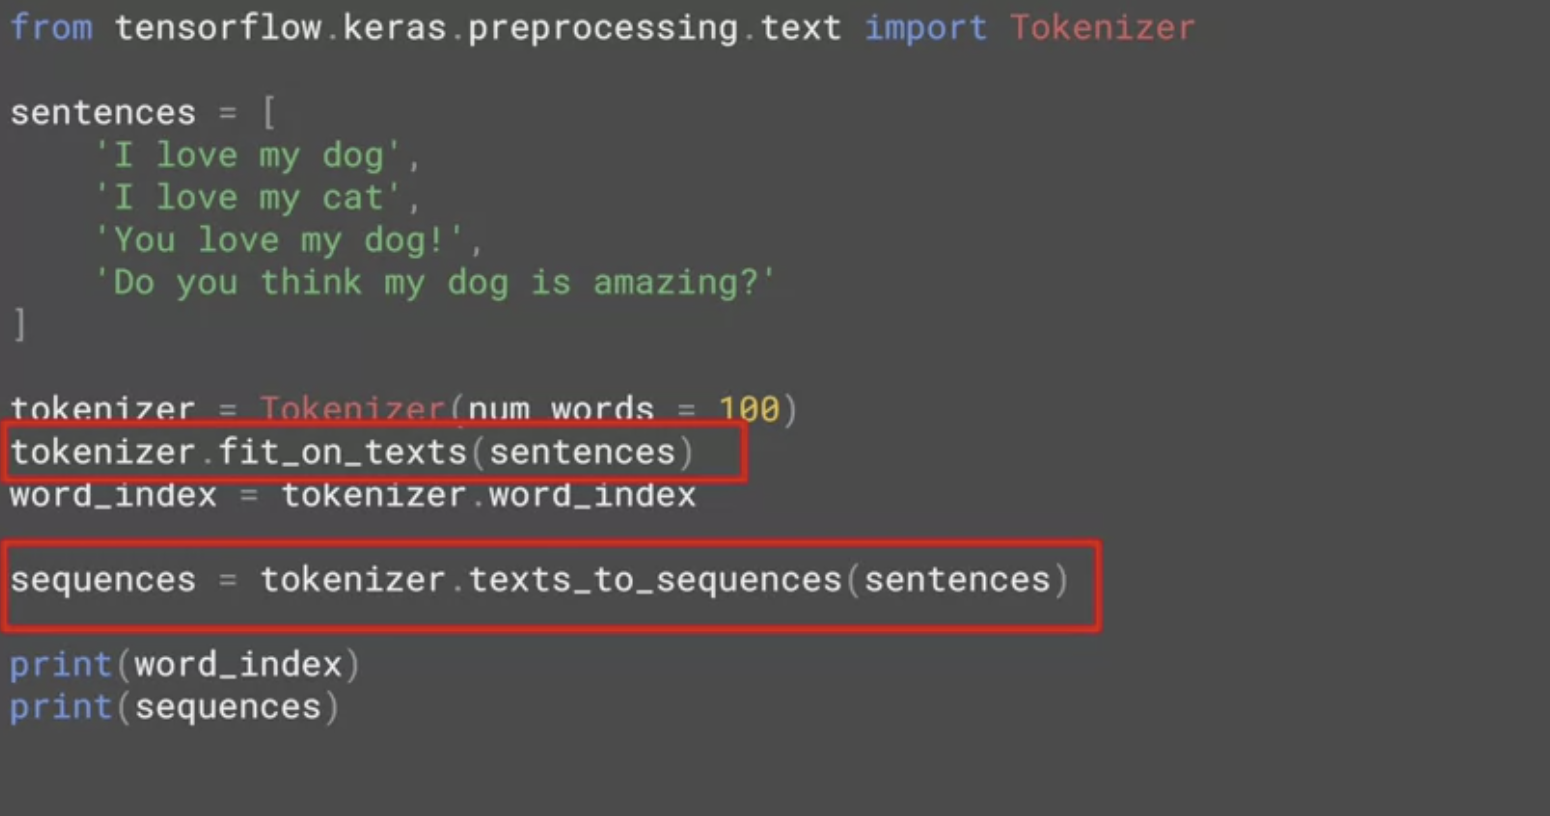

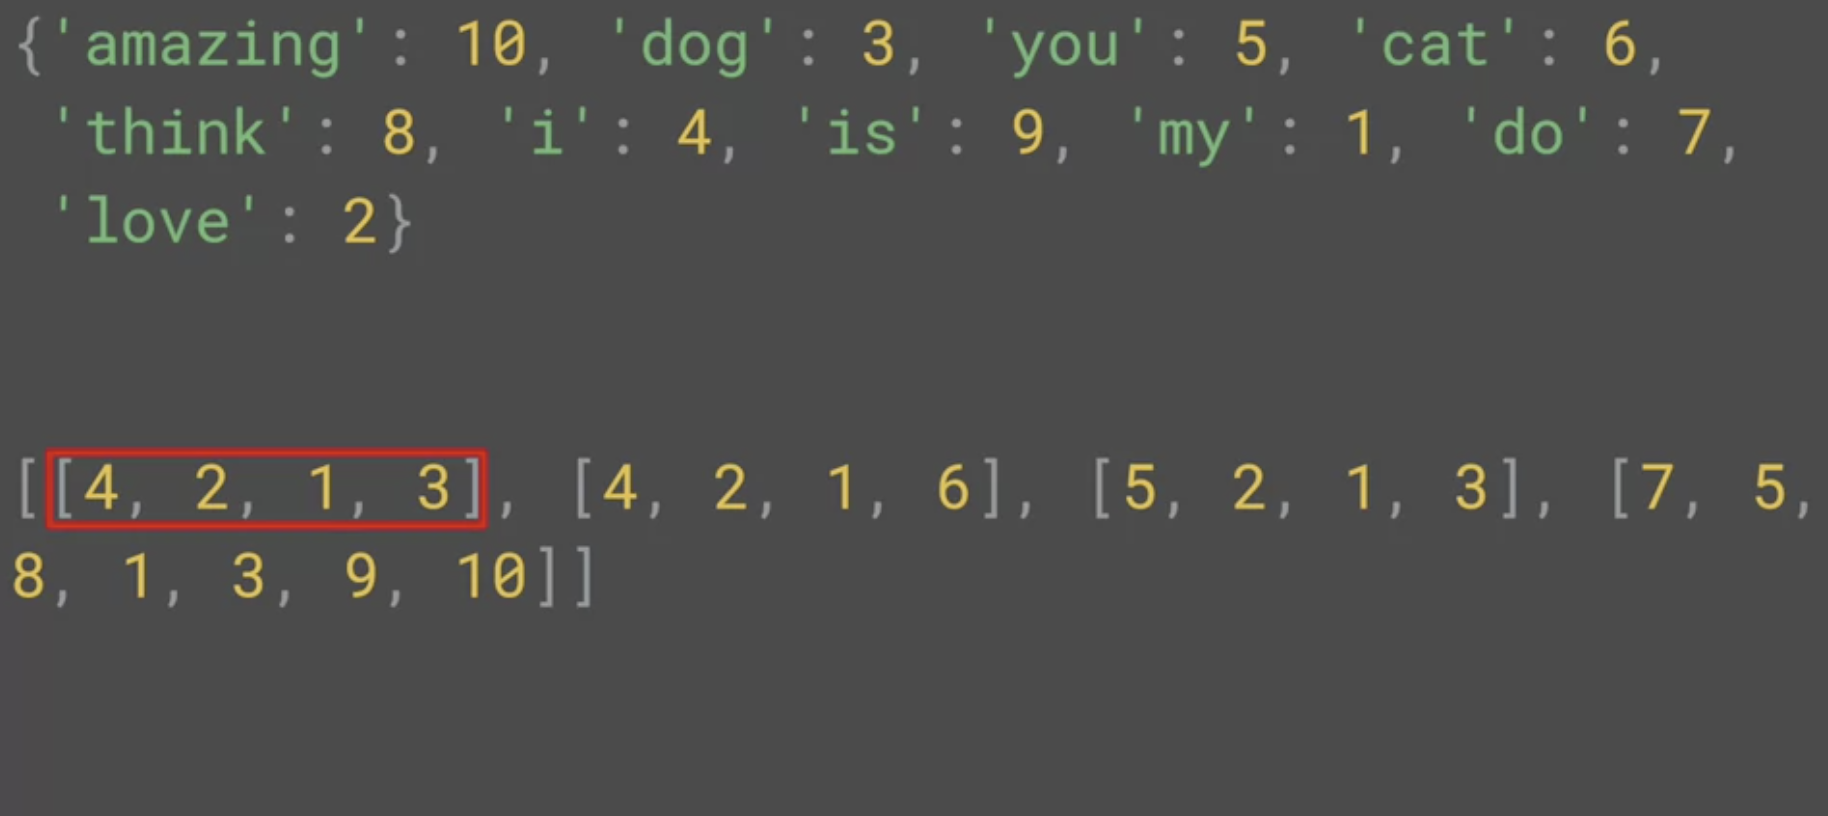

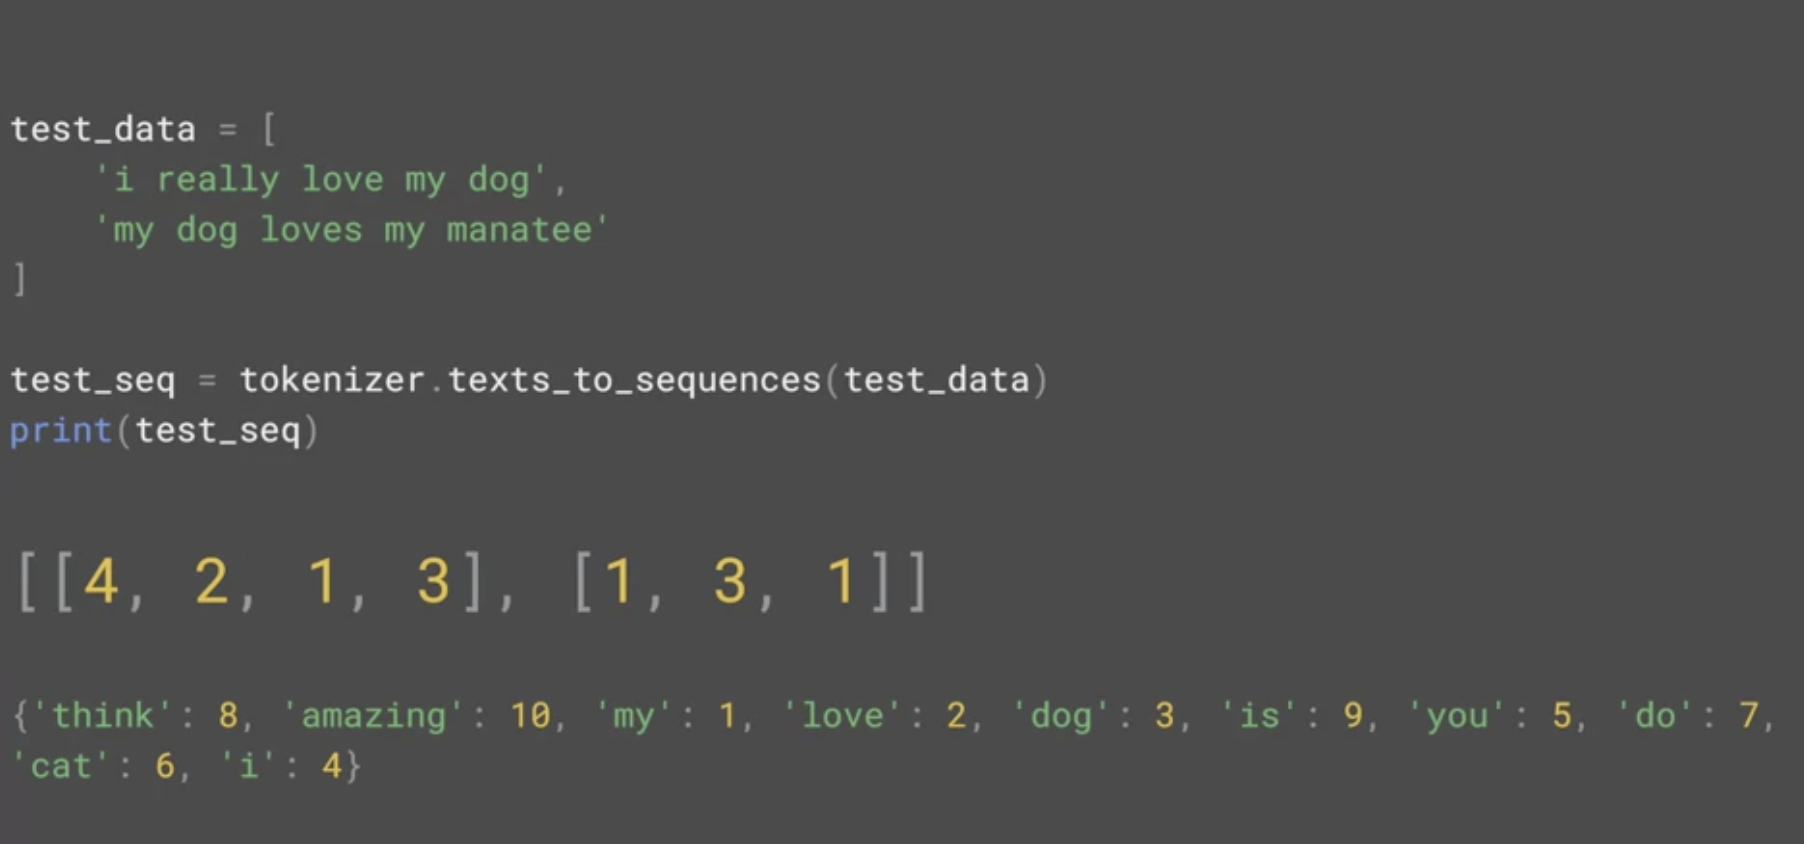

<div class="alert alert-block alert-warning">

Peki bundan ne öğreniyoruz? Her şeyden önce, geniş bir kelime dağarcığı elde etmek için gerçekten çok fazla eğitim verisine ihtiyacımız var, yoksa az önce yaptığımız gibi köpeğim benim gibi cümleler kurabiliriz. İkincisi, çoğu durumda, görünmeyen sözcükleri görmezden gelmek yerine, görülmeyen bir sözcükle karşılaşıldığında özel bir değer vermek iyi bir fikirdir. Bunu belirteç üzerindeki bir özellik ile yapabilirsiniz. Hadi bir bakalım. İşte hem orijinal cümleleri hem de test verilerini gösteren tam kod. Değiştirdiğim şey, belirteç oluşturucuya bir özellik oov belirteci eklemek. Şimdi, dış sözcük dağarcığı için oov belirtecinin sözcük dizininde olmayan sözcükler için kullanılmasını istediğimi belirttiğimi görebilirsiniz. Burada istediğinizi kullanabilirsiniz, ancak bunun gerçek bir kelimeyle karıştırılmayan benzersiz ve farklı bir şey olması gerektiğini unutmayın. Şimdi, eğer bu kodu çalıştırırsam, test dizilerimin şöyle görünmesini sağlayacağım. Araştırabilmeniz için kelime indeksini aşağıya yapıştırdım. İlk cümle, kelime dağarcığım bitti, köpeğimi seviyorum olacak. İkincisi olacak, benim köpeğim oov, my oov Hala sözdizimsel olarak harika değil, ama daha iyi gidiyor. Derlem büyüdükçe ve dizine daha fazla kelime girdikçe, umarım daha önce görülmemiş cümleler daha iyi kapsama sahip olacaktır. Sırada dolgu var. Daha önce de bahsettiğimiz gibi, resimleri işlemek için sinir ağları kurarken. Onları eğitim için ağa beslediğimizde, boyut olarak tek tip olmalarına ihtiyacımız vardı. Genellikle, görüntüyü örneğin sığacak şekilde yeniden boyutlandırmak için oluşturucuları kullanırız. Metinlerle antrenman yapmadan önce benzer bir gereksinimle karşı karşıya kalacaksınız, bir miktar tekdüzelik düzeyine sahip olmamız gerekiyordu, bu yüzden dolgu orada arkadaşınız.

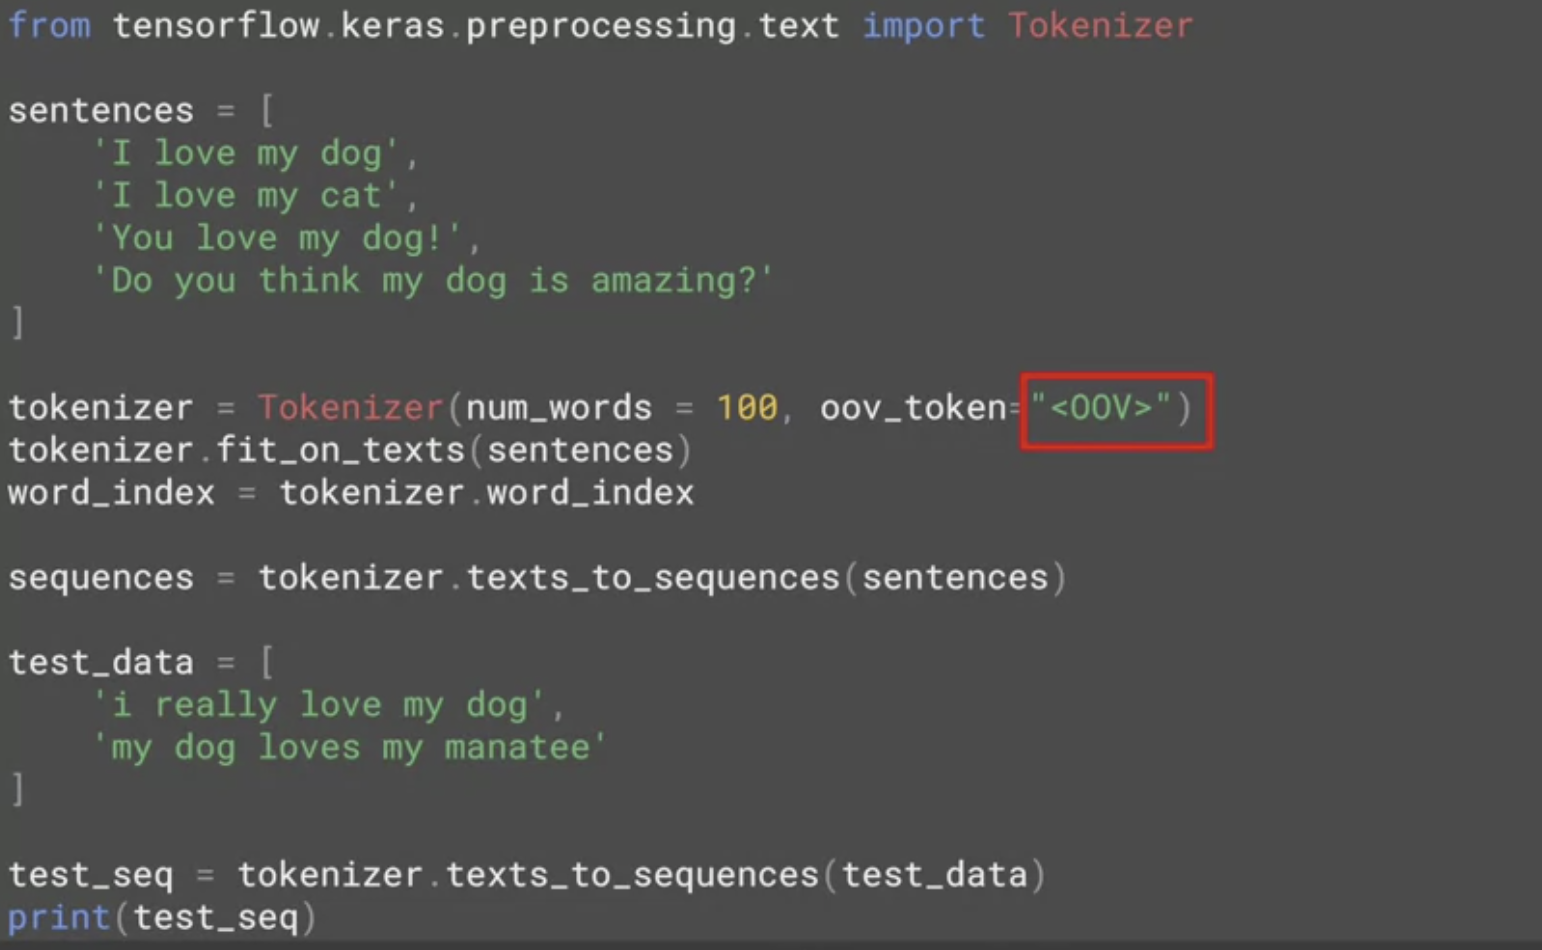

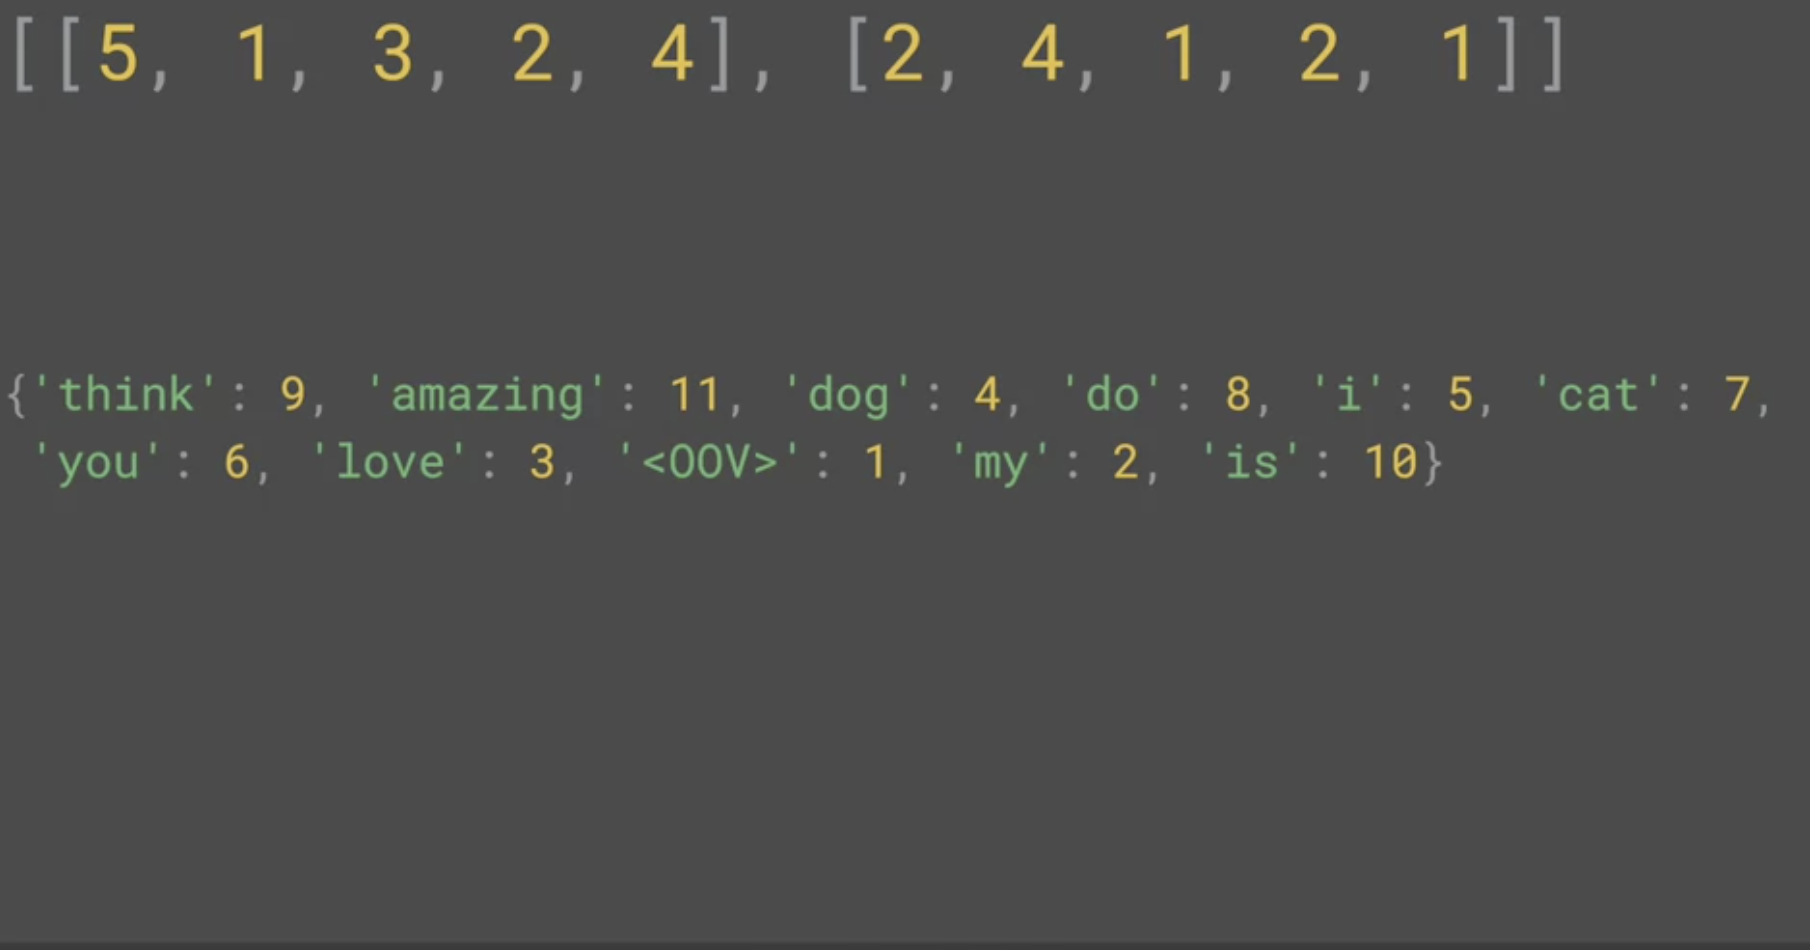

<div class="alert alert-block alert-warning">


Bu yüzden, paddingi işlemek için kodda birkaç değişiklik yaptım. İşte tam liste ve parça parça ayıracağız. İlk olarak, doldurma işlevlerini kullanmak için, tensorflow.carastoppreprocessing.sequence'den pad dizilerini içe aktarmanız gerekir. Ardından, belirteç dizileri oluşturduktan sonra, bu diziler, bu şekilde doldurulmaları için pad dizilerine geçirilebilir. Sonuç oldukça düz ileri. Artık cümle listesinin bir matris halinde doldurulduğunu ve matristeki her satırın aynı uzunlukta olduğunu görebilirsiniz. Bunu cümlenin önüne uygun sayıda sıfır koyarak başarmıştır. Yani 5.3.2.4 cümlesi durumunda aslında hiçbir şey yapmadı. Buradaki daha uzun cümle durumunda herhangi bir şey yapmasına gerek yoktu. Çoğu zaman, dolgunun az önce gördüğünüz gibi cümleden önce değil, cümleden sonra olduğu örnekleri göreceksiniz. Eğer benim gibi bu konuda daha rahatsanız, padding equals post parametresini ekleyerek kodu bununla değiştirebilirsiniz. Matris genişliğinin en uzun cümleyle aynı olduğunu fark etmiş olabilirsiniz. Ancak bunu maxlen parametresiyle geçersiz kılabilirsiniz. Örneğin, cümlelerinizin yalnızca en fazla beş kelime olmasını istiyorsanız. Bu şekilde maxlen eşittir beş diyebilirsiniz. Bu tabii ki soruya yol açacaktır. Maksimum uzunluktan daha uzun cümlelerim varsa, bilgiyi kaybederim ama nereden. Dolguda olduğu gibi, varsayılan pre'dir, bu da cümlenin başından itibaren kaybedeceğiniz anlamına gelir. Sondan kaybetmek için bunu geçersiz kılmak istiyorsanız, bunun gibi kesme parametresiyle bunu yapabilirsiniz. Böylece, artık cümlelerinizi nasıl kodlayacağınızı, onları nasıl dolduracağınızı ve önceden görülmeyen cümleleri kelime hazinesi olmayan karakterleri kullanarak kodlamak için Word indekslemeyi nasıl kullanacağınızı gördünüz. Ama bunu çok basit sabit kodlanmış verilerle yaptınız. Bir ekran görüntüsündeki kodlanmış eyleme bir göz atalım ve sonra geri dönüp çok daha karmaşık verilerin nasıl kullanılacağına bakacağız.

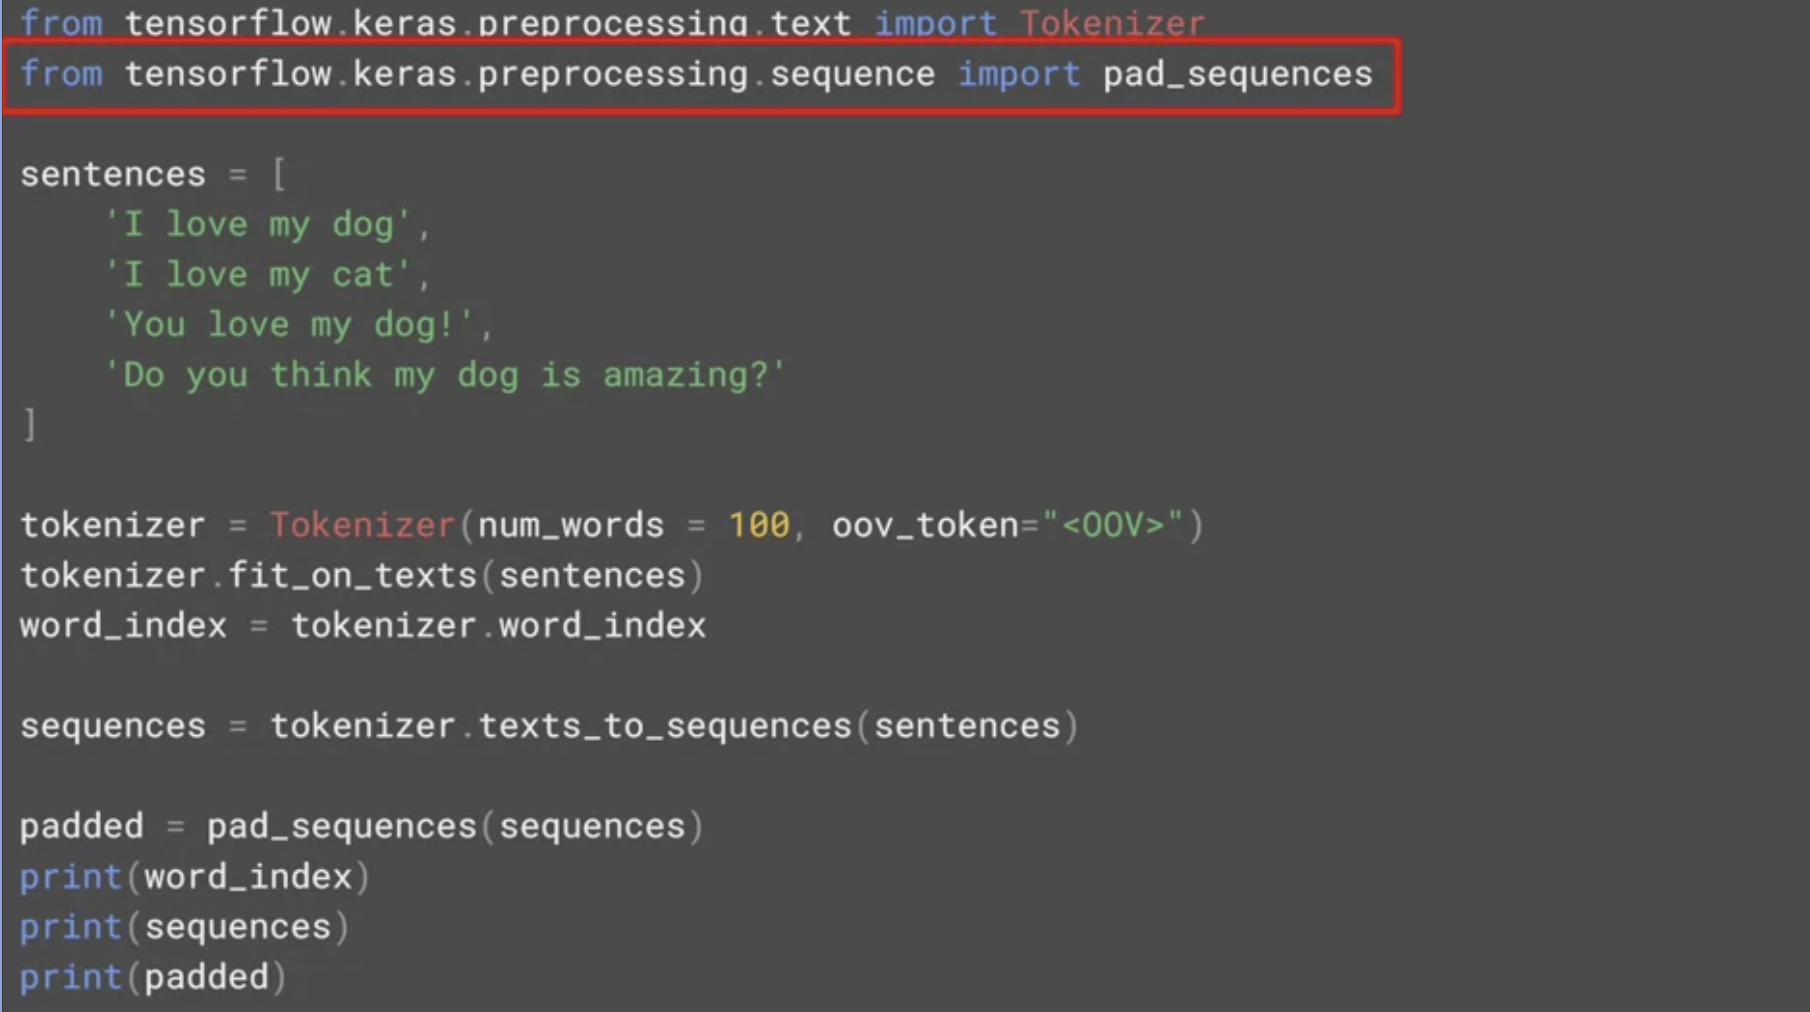

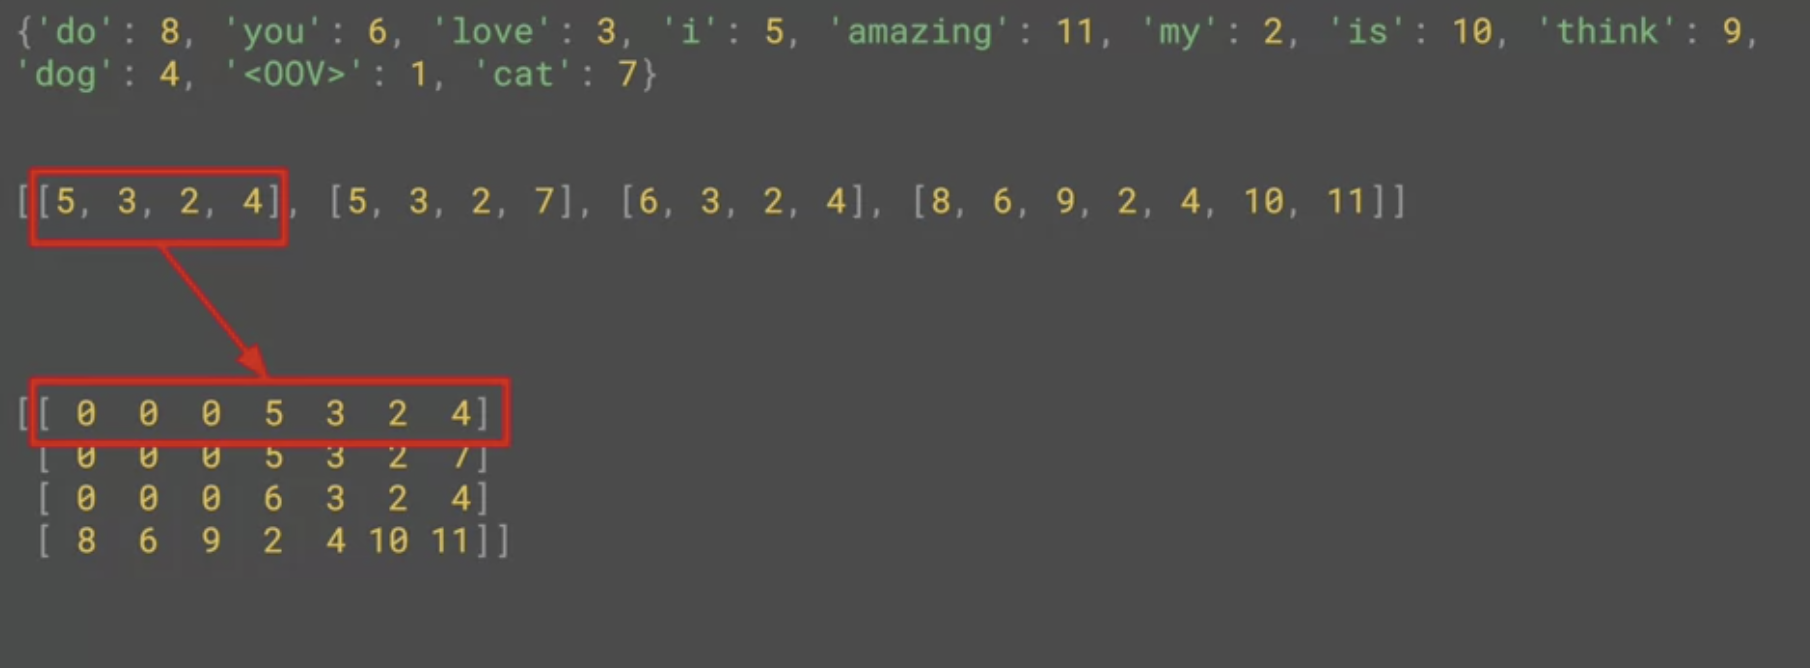

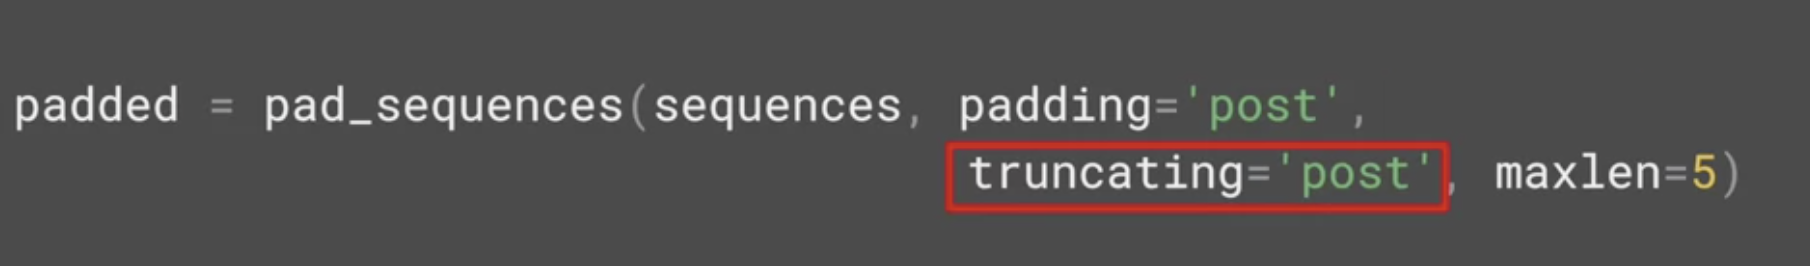

In [3]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=3)
print("\nPadded Test Sequence: ")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]

Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[3 2 4]
 [1 2 1]]


<div class="alert alert-block alert-warning">


Bu hafta şimdiye kadar, metinlere ve metnin nasıl simgeleştirileceğine ve ardından TensorFlow'da bulunan araçları kullanarak cümleleri dizilere nasıl dönüştüreceğinize baktınız. Bunu çok basit, sabit kodlanmış cümleler kullanarak yaptınız. Ama elbette, gerçek dünya problemlerini çözmeye gelince, bu basit cümlelerden çok daha fazla veri kullanacaksınız. Bu derste, bazı genel veri kümelerine ve onları bir sinir ağını eğitmeye hazır hale getirmek için nasıl işleyebileceğinize bir göz atacağız. Rishabh Misra tarafından yayınlanan ve bu bağlantıdaki Kaggle ile ilgili ayrıntılarla başlayacağız. Bu, alaycılık tespitinde gerçekten eğlenceli bir CC0 kamu malı veri setidir. Yok canım? Evet gerçekten. Bu veri seti çok basit ve basittir, ayrıca çalışılması çok kolay. İçinde üç unsur var. Birincisi alaycı, bizim etiketimiz. Kayıt alaycı olarak kabul edilirse birdir, aksi takdirde sıfırdır. İkincisi, yalnızca düz metin olan bir başlık ve üçüncüsü, başlığın açıkladığı makalenin bağlantısıdır. HTML içeriğini ayrıştırmak, komut dosyalarını ve stilleri vb. çıkarmak bu kursun kapsamının biraz dışındadır. Bu yüzden sadece manşetlere odaklanacağız. Verileri o Kaggle sitesinden indirirseniz, bunun gibi bir şey göreceksiniz. Gördüğünüz gibi, adın makale bağlantısı, başlık ve is_sarcastic olduğu ve değerlerin gösterildiği gibi olduğu ad-değer çiftlerine sahip bir liste girdileri kümesidir. Bu verileri Python'a yüklemeyi çok daha kolay hale getirmek için, verilerde şöyle görünmesi için küçük bir ayar yaptım, bunu yapmaktan çekinmeyin veya değiştirilmiş veri setimi ortak laboratuvardaki bağlantıdan indirebilirsiniz. kursun bu kısmı. Böyle verilere sahip olduğunuzda, onu Python'a yüklemek gerçekten çok kolay. Şimdi koda bir göz atalım. Bu yüzden önce JSON'u içe aktarmanız gerekir. Bu, verileri JSON biçiminde yüklemenize ve ondan otomatik olarak bir Python veri yapısı oluşturmanıza olanak tanır. Bunu yapmak için dosyayı açmanız ve json.load'a göndermeniz yeterlidir; üç tür verinin listesini içeren bir liste alırsınız: başlıklar, URL'ler ve is_sarcastic etiketleri. Cümlelerin tokenizer'a kendi listeleri olarak geçmesini istediğim için, daha sonra bir cümle listesi oluşturabilirim ve daha sonra, bir sinir ağı oluşturmak için etiketler istersem, onların da bir listesini oluşturabilirim. Hazır buradayken, URL'leri burada kullanmayacak olsam da yapabilirim, ancak isteyebilirsiniz. Artık veri deposu döngüsünde for öğesiyle oluşturulan listeyi yineleyebilirim. Her öğe için, başlığı cümlelerime, is_sarcastic'i etiketlerime ve makale_bağlantısını URL'lerime kopyalayabilirim. Şimdi belirteçte üzerinde çalışabileceğim bir şey var, o yüzden bir sonrakine bakalım.

In [15]:
# sarcasm.json
#!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
  
import json
data = [json.loads(line) for line in open('Sarcasm_Headlines_Dataset.json', 'r')]


sentences = [] 
labels = []
urls = []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])



from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

29657
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [18]:
import csv

from tensorflow.keras.preprocessing.sequence import pad_sequences


stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


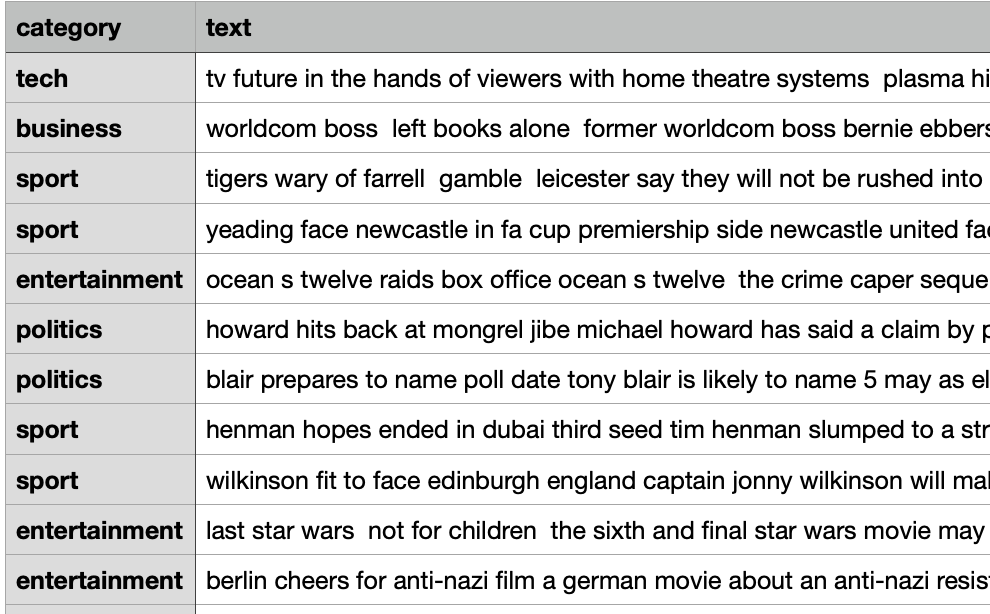

In [1]:
sentences = []
labels = []

with open("./bbc-text.csv", 'r') as csvfile:
    readd = csv.reader(csvfile, delimiter=',')
    
    next(readd)
    for i in readd:
        labels.append(i[0])
        text = i[1]
        for k in stopwords:
            token = " " + k + " "
            text = text.replace(token," ")
            text = text.replace("  ", " ")
        sentences.append(text)
        
print(len(sentences))
print(sentences[0])

print(len(labels))
print(labels[:10])


FileNotFoundError: [Errno 2] No such file or directory: './bbc-text.csv'

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<00V')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

29714


In [52]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding = 'post')

print(padded[0])
print(padded.shape)

[  96  176 1158 ...    0    0    0]
(2225, 2442)


In [57]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index 
label_seq = label_tokenizer.texts_to_sequences(labels)

print(label_word_index)
print(label_seq)



{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}
[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], 